# **Automatidata project**

# Build a multiple linear regression model

## PACE: **Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.


### 1. Imports and loading
Import the packages that you've learned are needed for building linear regression models.

In [1]:
# Import packages
# Packages for numerics + dataframes
import pandas as pd
import numpy as np

# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Packages for date conversions for calculating trip durations
from sklearn.preprocessing import StandardScaler

# Packages for OLS, MLR, confusion matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

**Note:** `Pandas` is used to load the NYC TLC dataset. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# Load dataset into dataframe 
df0=pd.read_csv("2017_Yellow_Taxi_Trip_Data.csv") 


## PACE: **Analyze**


### 2a. Explore data with EDA

Analyze and discover data, looking for correlations, missing data, outliers, and duplicates.

In [3]:
# Start with `.shape` and `.info()`
df = df0.copy()
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

Check for missing data and duplicates using `.isna()` and `.drop_duplicates()`.

In [4]:
# Check for missing data and duplicates using .isna() and .drop_duplicates()
#total missing values
print('Total counts of missing values:', df.isna().sum().sum())

print('shape of data:', df.shape)
print('shape of data without duplicates:', df.drop_duplicates().shape)

# number of missing values in each column
df.isna().sum()

Total counts of missing values: 0
shape of data: (22699, 18)
shape of data without duplicates: (22699, 18)


Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

Use `.describe()`.

In [5]:
# Use .describe()
df.describe(include='all')

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699,22699,22699.000000,22699.000000,22699.000000,22699,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
unique,NaN,NaN,22687,22688,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,07/03/2017 3:45:19 PM,10/18/2017 8:07:45 PM,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,2,2,NaN,NaN,NaN,22600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5.675849e+07,1.556236,NaN,NaN,1.642319,2.913313,1.043394,NaN,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,NaN,NaN,1.285231,3.653171,0.708391,NaN,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,NaN,NaN,0.000000,0.000000,1.000000,NaN,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,NaN,NaN,1.000000,0.990000,1.000000,NaN,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,NaN,NaN,1.000000,1.610000,1.000000,NaN,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,NaN,NaN,2.000000,3.060000,1.000000,NaN,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000


### 2b. Convert pickup & dropoff columns to datetime


In [6]:
# Check the format of the data
df.dtypes

Unnamed: 0                 int64
VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
RatecodeID                 int64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtype: object

In [7]:
# Convert datetime columns to datetime
import datetime as dt

df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

### 2c. Create duration column

Create a new column called `duration` that represents the total number of minutes that each taxi ride took.

In [8]:
# Create `duration` column
df['duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime'])/pd.Timedelta(minutes=1)
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,14.066667
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,26.500000
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.200000
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,16.716667


### Outliers

Call `df.info()` to inspect the columns and decide which ones to check for outliers.

In [9]:
# inspect columns
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

### 2d. Box plots

Plot a box plot for each feature: `trip_distance`, `fare_amount`, `duration`.

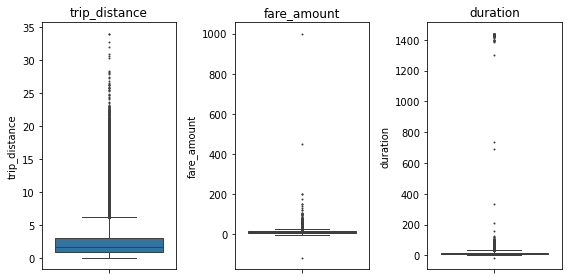

In [10]:
# plot a box plot for each feature to check the data distribution
fig, axes = plt.subplots(1, 3, figsize=(8,4))

sns.boxplot(y=df['trip_distance'], fliersize=1, ax = axes[0])
sns.boxplot(y=df['fare_amount'], fliersize=1, ax = axes[1])
sns.boxplot(y=df['duration'], fliersize=1, ax = axes[2])

axes[0].set_title('trip_distance')
axes[1].set_title('fare_amount')
axes[2].set_title('duration')

plt.tight_layout()

### 2e. Imputations

#### `trip_distance` outliers

Sort the column values, eliminate duplicates, and inspect the least 10 values. Are they rounded values or precise values?

In [11]:
# Are trip distances of 0 bad data or very short trips rounded down?
df['trip_distance'].sort_values().drop_duplicates().head(20)

22026    0.00
5501     0.01
16827    0.02
21088    0.03
13517    0.04
10146    0.05
14373    0.06
922      0.07
22523    0.08
22035    0.09
3288     0.10
16467    0.11
314      0.12
1798     0.13
7263     0.14
8861     0.15
22269    0.16
12944    0.17
22049    0.18
17240    0.19
Name: trip_distance, dtype: float64

The distances are captured with a high degree of precision. However, it might be possible for trips to have distances of zero if a passenger summoned a taxi and then changed their mind. Besides, are there enough zero values in the data to pose a problem?

Calculate the count of rides where the `trip_distance` is zero.

In [12]:
#Calculate the count of rides where the trip_distance is zero.
sum(df['trip_distance']==0)

148

#### `fare_amount` outliers

In [13]:
# fare_amount descriptive analysis
df['fare_amount'].describe()

count    22699.000000
mean        13.026629
std         13.243791
min       -120.000000
25%          6.500000
50%          9.500000
75%         14.500000
max        999.990000
Name: fare_amount, dtype: float64

**Question:** What do you notice about the values in the `fare_amount` column?

Impute values less than $0 with `0`.

There are negative values for the fare_amount column. The negative values are problematic.
The highest value is 1000, which is unlikely in real life. 

In [14]:
# Impute values less than $0 with 0
df.loc[df['fare_amount']<0, 'fare_amount'] = 0
df['fare_amount'].min()

0.0

Now impute the maximum value as `Q3 + (6 * IQR)`.

In [15]:
# built a method to impute the outliers
def outlier_impute(column_list, iqr_factor):
    '''
    Impute upper-limit values in specified columns based on their interquartile range.

    Arguments:
        column_list: A list of columns to iterate over
        iqr_factor: A number representing x in the formula:
                    Q3 + (x * IQR). Used to determine maximum threshold,
                    beyond which a point is considered an outlier.

    The IQR is computed for each column in column_list and values exceeding
    the upper threshold for each column are imputed with the upper threshold value.
    '''
    for col in column_list:
        # Reassign minimum to zero
        df.loc[df[col]<0, col] = 0
        
        # Calculate upper threshold
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        print(col)
        print(f"iqr: {iqr}")
        upper_threshold = q3 + iqr*iqr_factor
        print(f'upper_threshold: {upper_threshold}')
        
        # Reassign values > threshold to threshold
        df.loc[df[col] > upper_threshold, col] = upper_threshold
        print(df[col].describe())

In [16]:
outlier_impute(['fare_amount'], 6)

fare_amount
iqr: 8.0
upper_threshold: 62.5
count    22699.000000
mean        12.897913
std         10.541137
min          0.000000
25%          6.500000
50%          9.500000
75%         14.500000
max         62.500000
Name: fare_amount, dtype: float64


#### `duration` outliers


In [17]:
# Call .describe() for duration outliers
df['duration'].describe()

count    22699.000000
mean        17.013777
std         61.996482
min        -16.983333
25%          6.650000
50%         11.183333
75%         18.383333
max       1439.550000
Name: duration, dtype: float64

The `duration` column has problematic values at both the lower and upper extremities.

* **Low values:** There should be no values that represent negative time. Impute all negative durations with `0`.

* **High values:** Impute high values the same way you imputed the high-end outliers for fares: `Q3 + (6 * IQR)`.

In [18]:
# Impute a 0 for any negative values
df.loc[df['duration'] <0, 'duration'] = 0
df['duration'].min()

0.0

In [19]:
# Impute the high outliers
outlier_impute(['duration'], 6)

duration
iqr: 11.733333333333333
upper_threshold: 88.78333333333333
count    22699.000000
mean        14.460555
std         11.947043
min          0.000000
25%          6.650000
50%         11.183333
75%         18.383333
max         88.783333
Name: duration, dtype: float64


### 3a. Feature engineering

#### Create `mean_distance` column

When deployed, the model will not know the duration of a trip until after the trip occurs, so we cannot train a model that uses this feature. However, we can use the statistics of trips we *do* know to generalize about ones we do not know.

In this step, create a column called `mean_distance` that captures the mean distance for each group of trips that share pickup and dropoff points.

For example, if your data were:

|Trip|Start|End|Distance|
|--: |:---:|:-:|    |
| 1  | A   | B | 1  |
| 2  | C   | D | 2  |
| 3  | A   | B |1.5 |
| 4  | D   | C | 3  |

The results should be:
```
A -> B: 1.25 miles
C -> D: 2 miles
D -> C: 3 miles
```

Notice that C -> D is not the same as D -> C. All trips that share a unique pair of start and end points get grouped and averaged.

Then, a new column `mean_distance` will be added where the value at each row is the average for all trips with those pickup and dropoff locations:

|Trip|Start|End|Distance|mean_distance|
|--: |:---:|:-:|  :--   |:--   |
| 1  | A   | B | 1      | 1.25 |
| 2  | C   | D | 2      | 2    |
| 3  | A   | B |1.5     | 1.25 |
| 4  | D   | C | 3      | 3    |


Begin by creating a helper column called `pickup_dropoff`, which contains the unique combination of pickup and dropoff location IDs for each row.

One way to do this is to convert the pickup and dropoff location IDs to strings and join them, separated by a space. The space is to ensure that, for example, a trip with pickup/dropoff points of 12 & 151 gets encoded differently than a trip with points 121 & 51.

So, the new column would look like this:

|Trip|Start|End|pickup_dropoff|
|--: |:---:|:-:|  :--         |
| 1  | A   | B | 'A B'        |
| 2  | C   | D | 'C D'        |
| 3  | A   | B | 'A B'        |
| 4  | D   | C | 'D C'        |


In [20]:
# Create `pickup_dropoff` column
df['pickup_dropoff'] = df['PULocationID'].astype('str') + " " + df['DOLocationID'].astype('str')
df['pickup_dropoff'].value_counts()


264 264    277
237 236    124
236 236    110
236 237    102
237 237     96
          ... 
66 162       1
79 116       1
166 1        1
164 224      1
249 17       1
Name: pickup_dropoff, Length: 4172, dtype: int64

Now, use a `groupby()` statement to group each row by the new `pickup_dropoff` column, compute the mean, and capture the values only in the `trip_distance` column. Assign the results to a variable named `grouped`.

In [21]:
### YOUR CODE HERE ###
grouped = df.groupby('pickup_dropoff')[['trip_distance']].mean()

grouped

,trip_distance
pickup_dropoff,
1 1,2.433333
10 148,15.700000
100 1,16.890000
100 100,0.253333
100 107,1.180000
...,...
97 65,0.500000
97 66,1.400000
97 80,3.840000


In [22]:
# 1. Convert `grouped` to a dictionary
grouped_dict = grouped.to_dict()

# 2. Reassign to only contain the inner dictionary
grouped_dict = grouped_dict['trip_distance']
grouped_dict

{'1 1': 2.433333333333333,
 '10 148': 15.7,
 '100 1': 16.89,
 '100 100': 0.25333333333333335,
 '100 107': 1.18,
 '100 113': 2.024,
 '100 114': 1.94,
 '100 12': 4.55,
 '100 125': 2.84,
 '100 13': 4.201666666666667,
 '100 132': 17.2175,
 '100 137': 1.299,
 '100 138': 10.432857142857143,
 '100 140': 2.746,
 '100 141': 2.11,
 '100 142': 1.6958333333333335,
 '100 143': 1.5825,
 '100 144': 3.0066666666666664,
 '100 148': 4.1066666666666665,
 '100 151': 3.668,
 '100 152': 4.9,
 '100 158': 1.938,
 '100 161': 0.9813888888888889,
 '100 162': 1.2163636363636363,
 '100 163': 1.2656,
 '100 164': 0.841,
 '100 166': 5.199999999999999,
 '100 170': 0.8548,
 '100 177': 12.0,
 '100 181': 9.34,
 '100 186': 0.6404761904761904,
 '100 193': 4.39,
 '100 198': 9.01,
 '100 202': 5.3,
 '100 209': 4.43,
 '100 211': 2.48,
 '100 224': 1.9500000000000002,
 '100 225': 7.5,
 '100 229': 1.7850000000000001,
 '100 230': 0.72975,
 '100 231': 3.5216666666666665,
 '100 232': 3.8449999999999998,
 '100 233': 1.245833333333333

In [23]:
# 1. Create a mean_distance column that is a copy of the pickup_dropoff helper column
df['mean_distance'] = df['pickup_dropoff']

# 2. Map `grouped_dict` to the `mean_distance` column
df['mean_distance'] = df['mean_distance'].map(grouped_dict)

# Confirm that it worked
df['mean_distance'].head()


0    3.521667
1    3.108889
2    0.881429
3    3.700000
4    4.435000
Name: mean_distance, dtype: float64

#### Create `mean_duration` column

Repeat the process used to create the `mean_distance` column to create a `mean_duration` column.

In [24]:
grouped_duration = df.groupby('pickup_dropoff').mean()[['duration']]

# Create a dictionary where keys are unique pickup_dropoffs and values are
# mean trip duration for all trips with those pickup_dropoff combos
grouped_duration_dict = grouped_duration.to_dict()
grouped_duration_dict = grouped_duration_dict['duration']

df['mean_duration'] = df['pickup_dropoff']
df['mean_duration'] = df['mean_duration'].map(grouped_duration_dict)
# Confirm that it worked
df['mean_duration'].head()

0    22.847222
1    24.470370
2     7.250000
3    30.250000
4    14.616667
Name: mean_duration, dtype: float64

#### Create `day` and `month` columns

Create two new columns, `day` (name of day) and `month` (name of month) by extracting the relevant information from the `tpep_pickup_datetime` column.

In [25]:
# Create 'day' col
df['day'] = df['tpep_pickup_datetime'].dt.day_name().str.lower()

# Create 'month' col
df['month'] = df['tpep_pickup_datetime'].dt.strftime('%b').str.lower()

In [26]:
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,2.76,0.0,0.3,16.56,14.066667,100 231,3.521667,22.847222,saturday,mar
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,4.00,0.0,0.3,20.80,26.500000,186 43,3.108889,24.470370,tuesday,apr
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,1.45,0.0,0.3,8.75,7.200000,262 236,0.881429,7.250000,friday,dec
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,6.39,0.0,0.3,27.69,30.250000,188 97,3.700000,30.250000,sunday,may
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,0.00,0.0,0.3,17.80,16.716667,4 112,4.435000,14.616667,saturday,apr


#### Create `rush_hour` column

Define rush hour as:
* Any weekday (not Saturday or Sunday) AND
* Either from 06:00&ndash;10:00 or from 16:00&ndash;20:00

Create a binary `rush_hour` column that contains a 1 if the ride was during rush hour and a 0 if it was not.

In [27]:
# Create 'rush_hour' col
df['rush_hour'] = df['tpep_pickup_datetime'].dt.hour

# If day is Saturday or Sunday, impute 0 in `rush_hour` column
df.loc[df['day'].isin(['saturday', 'sunday']), 'rush_hour'] = 0

In [28]:
def rush_hourizer(hour):
    if 6 <= hour['rush_hour'] <= 10:
        val = 1
    elif 16 <= hour['rush_hour'] <= 20:
        val = 1
    else:
        val = 0
    
    return val

In [29]:
# Apply the `rush_hourizer()` function to the new column
weekday = {'monday', 'tuesday', 'wednesday', 'thursday', 'friday'}
df.loc[df['day'].isin(weekday), 'rush_hour'] = df.apply(rush_hourizer, axis = 1)
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month,rush_hour
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,0.0,0.3,16.56,14.066667,100 231,3.521667,22.847222,saturday,mar,0
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,0.0,0.3,20.80,26.500000,186 43,3.108889,24.470370,tuesday,apr,0
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,0.0,0.3,8.75,7.200000,262 236,0.881429,7.250000,friday,dec,1
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,0.0,0.3,27.69,30.250000,188 97,3.700000,30.250000,sunday,may,0
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,0.0,0.3,17.80,16.716667,4 112,4.435000,14.616667,saturday,apr,0


### Task 4. Scatter plot

Create a scatterplot to visualize the relationship between `mean_duration` and `fare_amount`.

Text(0.5, 1.0, 'Mean duration - fare amount')

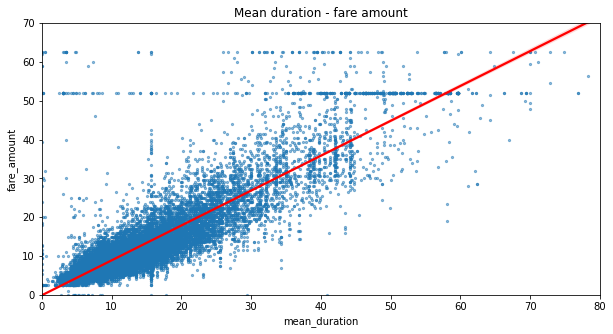

In [30]:
# Create a scatterplot to visualize the relationship between variables of interest
### YOUR CODE HERE ###
plt.figure(figsize=(10, 5))
sns.regplot(x=df['mean_duration'], y=df['fare_amount'],
           scatter_kws={'alpha':0.5, 's':5},
           line_kws={'color': 'red'})
plt.ylim(0,70)
plt.xlim(0, 80)
plt.title('Mean duration - fare amount')

You know what one of the lines represents. 62 dollars and 50 cents is the maximum that was imputed for outliers, so all former outliers will now have fare amounts of \$62.50. 52 dollars is the fare to JFK.

In [31]:
### YOUR CODE HERE ###
df[df['fare_amount']>50]['fare_amount'].value_counts()

52.0    514
62.5     84
59.0      9
50.5      9
57.5      8
51.0      7
60.0      6
55.0      6
51.5      6
53.0      4
52.5      4
61.0      3
62.0      3
55.5      3
56.0      3
56.5      3
58.5      2
59.5      2
61.5      2
57.0      2
54.0      2
58.0      1
54.7      1
54.5      1
Name: fare_amount, dtype: int64

Examine the first 30 of these trips.

In [32]:
# Set pandas to display all columns
pd.set_option('display.max_columns', None)
df[df['fare_amount']==52.0].head(30)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month,rush_hour
11,18600059,2,2017-03-05 19:15:30,2017-03-05 19:52:18,2,18.90,2,N,236,132,1,52.0,0.0,0.5,14.58,5.54,0.3,72.92,36.800000,236 132,19.211667,40.500000,sunday,mar,0
110,47959795,1,2017-06-03 14:24:57,2017-06-03 15:31:48,1,18.00,2,N,132,163,1,52.0,0.0,0.5,0.00,0.00,0.3,52.80,66.850000,132 163,19.229000,52.941667,saturday,jun,0
161,95729204,2,2017-11-11 20:16:16,2017-11-11 20:17:14,1,0.23,2,N,132,132,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,0.966667,132 132,2.255862,3.021839,saturday,nov,0
247,103404868,2,2017-12-06 23:37:08,2017-12-07 00:06:19,1,18.93,2,N,132,79,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,29.183333,132 79,19.431667,47.275000,wednesday,dec,0
379,80479432,2,2017-09-24 23:45:45,2017-09-25 00:15:14,1,17.99,2,N,132,234,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20,29.483333,132 234,17.654000,49.833333,sunday,sep,0
388,16226157,1,2017-02-28 18:30:05,2017-02-28 19:09:55,1,18.40,2,N,132,48,2,52.0,4.5,0.5,0.00,5.54,0.3,62.84,39.833333,132 48,18.761905,58.246032,tuesday,feb,1
406,55253442,2,2017-06-05 12:51:58,2017-06-05 13:07:35,1,4.73,2,N,228,88,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,15.616667,228 88,4.730000,15.616667,monday,jun,0
449,65900029,2,2017-08-03 22:47:14,2017-08-03 23:32:41,2,18.21,2,N,132,48,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,45.450000,132 48,18.761905,58.246032,thursday,aug,0
468,80904240,2,2017-09-26 13:48:26,2017-09-26 14:31:17,1,17.27,2,N,186,132,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,42.850000,186 132,17.096000,42.920000,tuesday,sep,0
520,33706214,2,2017-04-23 21:34:48,2017-04-23 22:46:23,6,18.34,2,N,132,148,1,52.0,0.0,0.5,5.00,0.00,0.3,57.80,71.583333,132 148,17.994286,46.340476,sunday,apr,0



All the trips are associated with locationID 132 and have the same RatecodeID 2. The RatecodeID 2 indicates the trips fro JFK.

Lots of trips have the same tolls_amount 5.76 dollars and 5.54 dollars, this indicates the locatation 132 frequently visited may require tolls to get to and from.

Some trips happened in rush hour have extra charge of $4.5.

Mean distances for most of the trips are in the range of 17-20 miles and mean duration more than 40 min, few trips have relatively small distance and duration. So, the specific trip with RatecodeID 2 may have a flat fare.


### 5. Isolate modeling variables

Drop features that are redundant, irrelevant, or that will not be available in a deployed environment.

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

In [34]:
df1 = df[['VendorID', 'passenger_count', 'fare_amount', 'mean_distance', 'mean_duration', 'rush_hour']]
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         22699 non-null  int64  
 1   passenger_count  22699 non-null  int64  
 2   fare_amount      22699 non-null  float64
 3   mean_distance    22699 non-null  float64
 4   mean_duration    22699 non-null  float64
 5   rush_hour        22699 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 1.0 MB


### 6. Pair plot

Create a pairplot to visualize pairwise relationships between `fare_amount`, `mean_duration`, and `mean_distance`.

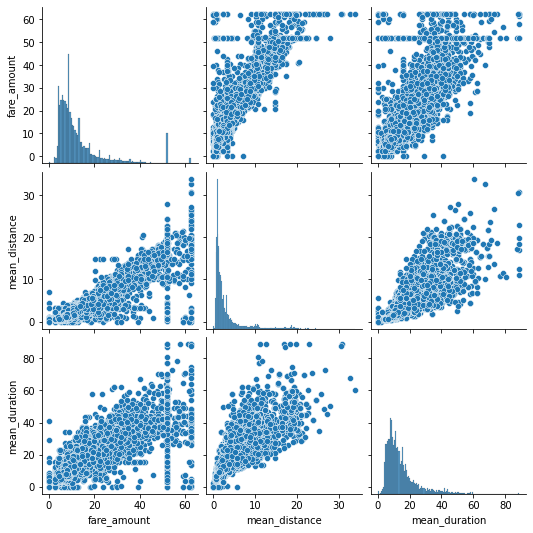

In [35]:
# Create a pairplot to visualize pairwise relationships between variables in the data
sns.pairplot(df1[['fare_amount', 'mean_distance', 'mean_duration']])

These variables all show linear correlation with each other. Investigate this further.

### 7. Identify correlations

Code a correlation matrix to help determine most correlated variables.

In [36]:
# Correlation matrix to help determine most correlated variables
df1.corr(method='pearson')

,VendorID,passenger_count,fare_amount,mean_distance,mean_duration,rush_hour
VendorID,1.000000,0.266463,0.001045,0.004741,0.001876,-0.000752
passenger_count,0.266463,1.000000,0.014942,0.013428,0.015852,-0.024283
fare_amount,0.001045,0.014942,1.000000,0.910185,0.859105,-0.025901
mean_distance,0.004741,0.013428,0.910185,1.000000,0.874864,-0.046794
mean_duration,0.001876,0.015852,0.859105,0.874864,1.000000,-0.027499
rush_hour,-0.000752,-0.024283,-0.025901,-0.046794,-0.027499,1.000000


Visualize a correlation heatmap of the data.

Text(0.5, 1.0, 'Correlation heatmap')

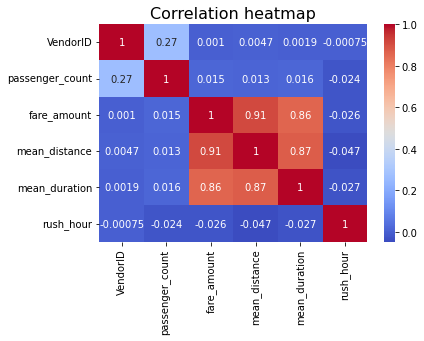

In [37]:
# Create correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(df1.corr(method='pearson'), annot=True, cmap='coolwarm')
plt.title('Correlation heatmap', fontsize=16)

The heatmap shows that both mean_distance and mean_duration are correlated with the dependent variable.


## PACE: **Construct**


### 8a. Split data into outcome variable and features

In [38]:
### YOUR CODE HERE ###
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         22699 non-null  int64  
 1   passenger_count  22699 non-null  int64  
 2   fare_amount      22699 non-null  float64
 3   mean_distance    22699 non-null  float64
 4   mean_duration    22699 non-null  float64
 5   rush_hour        22699 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 1.0 MB


Set your X and y variables. X represents the features and y represents the outcome (target) variable.

In [39]:
# Remove the target column from the features
X = df1.drop(columns=['fare_amount'])


# Set y variable
y=df1[['fare_amount']]

# Display first few rows
X.head()


,VendorID,passenger_count,mean_distance,mean_duration,rush_hour
0,2,6,3.521667,22.847222,0
1,1,1,3.108889,24.470370,0
2,1,1,0.881429,7.250000,1
3,2,1,3.700000,30.250000,0
4,2,1,4.435000,14.616667,0


### 8b. Pre-process data


Dummy encode categorical variables

In [40]:
# Convert VendorID to string
X['VendorID'] = X['VendorID'].astype(str)

# Get dummies
X = pd.get_dummies(X, drop_first = True)
X.head()

,passenger_count,mean_distance,mean_duration,rush_hour,VendorID_2
0,6,3.521667,22.847222,0,1
1,1,3.108889,24.470370,0,0
2,1,0.881429,7.250000,1,0
3,1,3.700000,30.250000,0,1
4,1,4.435000,14.616667,0,1


### Split data into training and test sets

Create training and testing sets. The test set should contain 20% of the total samples. Set `random_state=0`.

In [41]:
# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)


### Standardize the data

Use `StandardScaler()`, `fit()`, and `transform()` to standardize the `X_train` variables. Assign the results to a variable called `X_train_scaled`.

In [42]:
# Standardize the X variables
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
print('X_train_scaled', X_train_scaled)

X_train_scaled [[-0.4967541   2.10672801  2.50298377 -0.77308453 -1.11724471]
 [ 0.28736948  0.07835828  0.11517447  1.29351961  0.89505906]
 [-0.4967541  -0.41468394 -0.23109733 -0.77308453  0.89505906]
 ...
 [-0.4967541   0.60646125  0.99230285 -0.77308453 -1.11724471]
 [-0.4967541  -0.5934841  -0.86461668 -0.77308453  0.89505906]
 [-0.4967541  -0.45106226 -0.73785361  1.29351961  0.89505906]]


### Fit the model

Instantiate the model and fit it to the training data.

In [43]:
# Fit your model to the training data
lr=LinearRegression()
lr.fit(X_train_scaled, y_train)


LinearRegression()

### 8c. Evaluate model

### Train data

Evaluate the model performance by calculating the residual sum of squares and the explained variance score (R^2). Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.

In [44]:
# Evaluate the model performance on the training data
r_sqr = lr.score(X_train_scaled, y_train)
print('Coefficient of determination: ', r_sqr)

y_pred_train = lr.predict(X_train_scaled)

print('R^2: ', r2_score(y_train, y_pred_train))
print('MAE ', mean_absolute_error(y_train, y_pred_train))
print('MSE: ', mean_squared_error(y_train, y_pred_train))
print('RMSE: ', np.sqrt(mean_squared_error(y_train, y_pred_train)))

Coefficient of determination:  0.8467708102914876
R^2:  0.8467708102914876
MAE  2.1735161146277355
MSE:  17.122432955603934
RMSE:  4.137926166040657


### Test data

Calculate the same metrics on the test data. Scale the `X_test` data using the scaler that was fit to the training data. 

In [45]:
# Scale the X_test data
X_test_scaled = scaler.transform(X_test)
print('X_test_scaled', X_test_scaled)

X_test_scaled [[-0.4967541  -0.05272685  0.30659491 -0.77308453  0.89505906]
 [ 0.28736948 -0.22803836  0.04343511 -0.77308453 -1.11724471]
 [-0.4967541  -0.53177952 -0.73268634 -0.77308453  0.89505906]
 ...
 [-0.4967541   0.2728016   1.84572724  1.29351961  0.89505906]
 [-0.4967541  -0.33121511  0.07145446  1.29351961 -1.11724471]
 [-0.4967541   2.71636785  0.91974117 -0.77308453 -1.11724471]]


In [46]:
# Evaluate the model performance on the testing data
r_sqr = lr.score(X_test_scaled, y_test)
print('Coefficient of determination: ', r_sqr)

y_pred_test = lr.predict(X_test_scaled)

print('R^2: ', r2_score(y_test, y_pred_test))
print('MAE ', mean_absolute_error(y_test, y_pred_test))
print('MSE: ', mean_squared_error(y_test, y_pred_test))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred_test)))


Coefficient of determination:  0.8399132414542425
R^2:  0.8399132414542425
MAE  2.1609783140606504
MSE:  17.381695289884075
RMSE:  4.169136036385005


## PACE: **Execute**


### 9a. Results

Use the code cell below to get `actual`,`predicted`, and `residual` for the testing set, and store them as columns in a `results` dataframe.

In [47]:
# Create a `results` dataframe
results = pd.DataFrame({'actual': y_test['fare_amount'],
                        'predicted': y_pred_test.ravel()})

results['residual'] = results['actual'] - results['predicted']

results.describe()

,actual,predicted,residual
count,4540.000000,4540.000000,4540.000000
mean,12.868659,12.926238,-0.057580
std,10.421163,9.609615,4.169198
min,0.000000,2.837018,-26.219356
25%,6.500000,7.382611,-1.767284
50%,9.500000,9.528786,-0.541160
75%,14.500000,13.989352,0.886530
max,62.500000,88.719356,59.600511


### 9b. Visualize model results

Create a scatterplot to visualize `actual` vs. `predicted`.

Text(0.5, 1.0, 'Actual vs. Predicted')

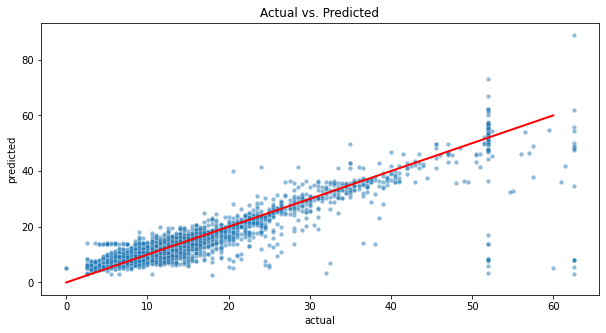

In [48]:
# Create a scatterplot to visualize `predicted` over `actual`
plt.figure(figsize=(10, 5))
sns.scatterplot(x='actual', y='predicted', data=results,
                s=20,
                alpha=0.5)
plt.plot([0, 60], [0, 60], c='red', linewidth=2)
plt.title('Actual vs. Predicted')


Visualize the distribution of the `residuals` using a histogram.

Text(0.5, 1.0, 'Distribution of residuals')

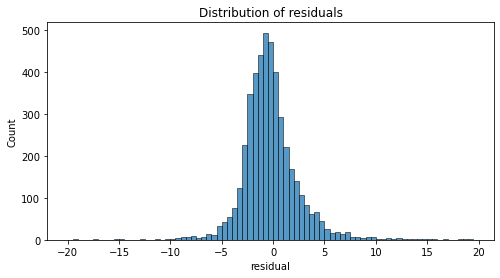

In [49]:
# Visualize the distribution of the `residuals`
plt.figure(figsize=(8, 4))
sns.histplot(results['residual'], bins = np.arange(-20, 20, 0.5))
plt.title('Distribution of residuals')


In [50]:
# Calculate residual mean
results['residual'].mean()

-0.057579881192733114

Create a scatterplot of `residuals` over `predicted`.

Text(0.5, 1.0, 'Scatterplot of rediduals over predicted values')

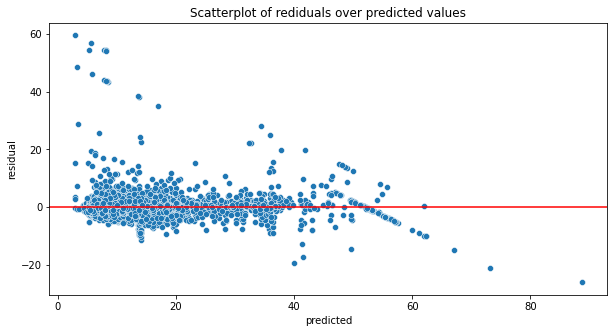

In [51]:
# Create a scatterplot of `residuals` over `predicted`
plt.figure(figsize=(10, 5))
sns.scatterplot(x='predicted', y='residual', data=results)
plt.axhline(0, c='red')
plt.title('Scatterplot of rediduals over predicted values')

### 9c. Coefficients

Use the `coef_` attribute to get the model's coefficients. The coefficients are output in the order of the features that were used to train the model. Which feature had the greatest effect on trip fare?

In [52]:
# Output the model's coefficients
coeffcients = pd.DataFrame(lr.coef_, columns=X.columns)
coeffcients

,passenger_count,mean_distance,mean_duration,rush_hour,VendorID_2
0,0.04667,7.108085,2.881468,0.132942,-0.04049


The coefficients reveal that mean_distance was the feature with the greatest effect on the model's prediction. However, the data used to train the model was standardized with StandardScaler(). Therefore, each unit of mean_distance represents a standard deviation of mean_distance in X_train. The std as showed above is 3.566607. Thus the modelbuil relinear regression model is interpreted as "With holding the other variables constant, for every 1 miles change in mean distance, the fare amount increases by a mean of $2 (7.13/3.566607).

In [58]:
# get the prediction of all the trip for machine learning buiding use
nyc_preds_means = X.loc[:, ['mean_duration', 'mean_distance']]
nyc_preds_means['predicted_fare'] = lr.predict(scaler.transform(X))

In [59]:
# export the data as csv file
df.to_csv('nyc_preds_means.csv', index=False)